In [2]:
!pip install requests pandas python-dotenv


In [3]:
API_KEY = "bd69c45dfb5266f214c04858a0a3679c"


In [4]:
import requests
import pandas as pd
import time

def get_weather(city):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}"
    response = requests.get(url).json()
    return {
        'city': city,
        'temperature': response['main']['temp'] - 273.15,  # Kelvin to Celsius
        'condition': response['weather'][0]['main'],
        'time': pd.to_datetime(response['dt'], unit='s')
    }


In [5]:
cities = ["Delhi", "Mumbai", "Chennai", "Bangalore", "Kolkata", "Hyderabad"]
weather_data = []

for city in cities:
    data = get_weather(city)
    weather_data.append(data)
    print(data)
    time.sleep(2)  # Avoid API rate limits

df = pd.DataFrame(weather_data)
print(df)


{'city': 'Delhi', 'temperature': 29.05000000000001, 'condition': 'Haze', 'time': Timestamp('2024-10-20 14:12:39')}
{'city': 'Mumbai', 'temperature': 28.99000000000001, 'condition': 'Thunderstorm', 'time': Timestamp('2024-10-20 14:22:45')}
{'city': 'Chennai', 'temperature': 28.980000000000018, 'condition': 'Clouds', 'time': Timestamp('2024-10-20 14:15:39')}
{'city': 'Bangalore', 'temperature': 22.920000000000016, 'condition': 'Rain', 'time': Timestamp('2024-10-20 14:14:42')}
{'city': 'Kolkata', 'temperature': 28.970000000000027, 'condition': 'Haze', 'time': Timestamp('2024-10-20 14:11:10')}
{'city': 'Hyderabad', 'temperature': 26.230000000000018, 'condition': 'Haze', 'time': Timestamp('2024-10-20 14:11:43')}
        city  temperature     condition                time
0      Delhi        29.05          Haze 2024-10-20 14:12:39
1     Mumbai        28.99  Thunderstorm 2024-10-20 14:22:45
2    Chennai        28.98        Clouds 2024-10-20 14:15:39
3  Bangalore        22.92          Rain 202

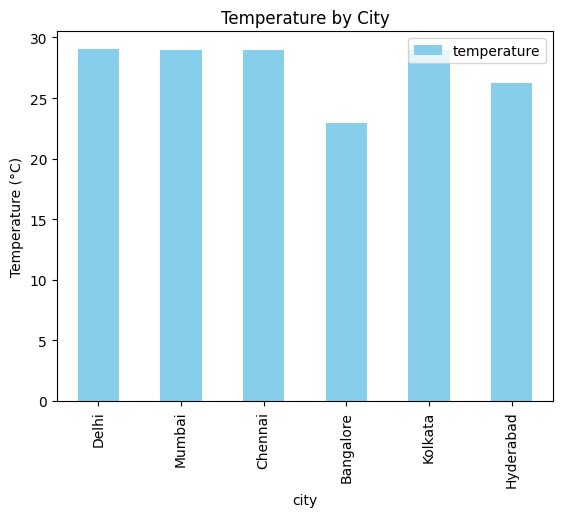

In [6]:
def alert_if_hot(city_data, threshold=35):
    if city_data['temperature'] > threshold:
        print(f"Alert: {city_data['city']} is too hot!")

for city in weather_data:
    alert_if_hot(city)

import matplotlib.pyplot as plt

df.plot(x='city', y='temperature', kind='bar', color='skyblue')
plt.title('Temperature by City')
plt.ylabel('Temperature (°C)')
plt.show()
